In [14]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis.
import numpy as np  # NumPy is used for working with arrays and matrices.
from sklearn.feature_extraction.text import TfidfVectorizer  # This is for converting text data into a format that can be analyzed.
from sklearn.metrics.pairwise import linear_kernel  # This is used to compute the similarity between items.
import plotly.express as px  # Plotly Express is a simpler interface for making plots.
import plotly.graph_objects as go  # Plotly's graph objects are for making more customized plots.

# Load data from a CSV file into a DataFrame
data = pd.read_csv("books_data.csv")
# Display the first five rows of the DataFrame
data.head()


,bookID,title,authors,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


Pandas (pd): A library that provides data structures and functions to manipulate structured data. It is commonly used to load, clean, manipulate, and analyze data.
NumPy (np): A library for numerical operations. It provides support for arrays (like lists but can only contain elements of the same type), matrices, and high-level mathematical functions.
TfidfVectorizer: Part of Scikit-learn's library, this tool converts a collection of raw text documents to a matrix of TF-IDF features. TF-IDF stands for "Term Frequency-Inverse Document Frequency," a way to measure how important a word is in a document relative to a collection of documents.
linear_kernel: Also from Scikit-learn, this function is used to compute the cosine similarity between sequences. It’s often used in recommendation systems.
Plotly (px and go): These libraries are used for creating interactive plots. px is used for simpler plots with less customization, while go is used for more detailed, customizable graphical outputs.
pd.read_csv("books_data.csv"): This line reads a CSV file into a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
data.head(): This function displays the first five rows of the DataFrame. It's useful for quickly testing if your data has loaded correctly, or for getting a quick view of your da







In [15]:
# Display the names of the columns in the DataFrame
data.columns

Index(['bookID', 'title', 'authors', 'average_rating'], dtype='object')

In [16]:
# Get a summary of the DataFrame including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


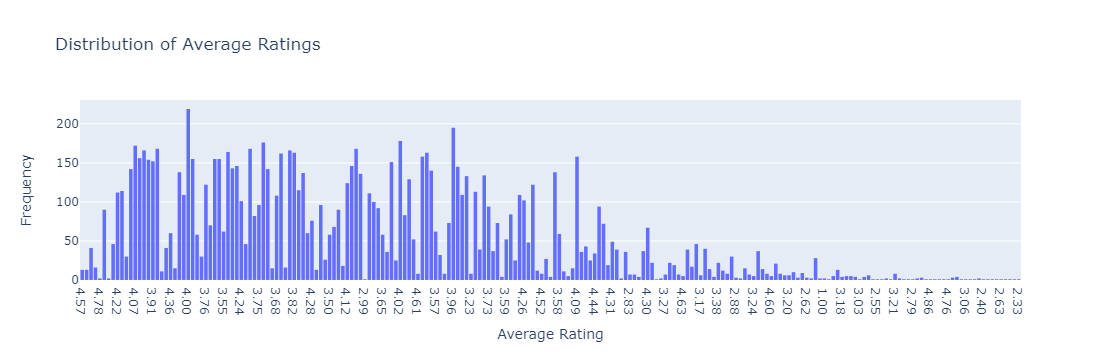

In [20]:
# Create a histogram of the average ratings from the DataFrame
fig = px.histogram(data, x='average_rating', 
                   nbins=30,  # Set the number of bins
                   title='Distribution of Average Ratings')  # Set the title of the plot

# Update the x-axis label
fig.update_xaxes(title_text='Average Rating')

# Update the y-axis label
fig.update_yaxes(title_text='Frequency')

# Display the plot
fig.show()


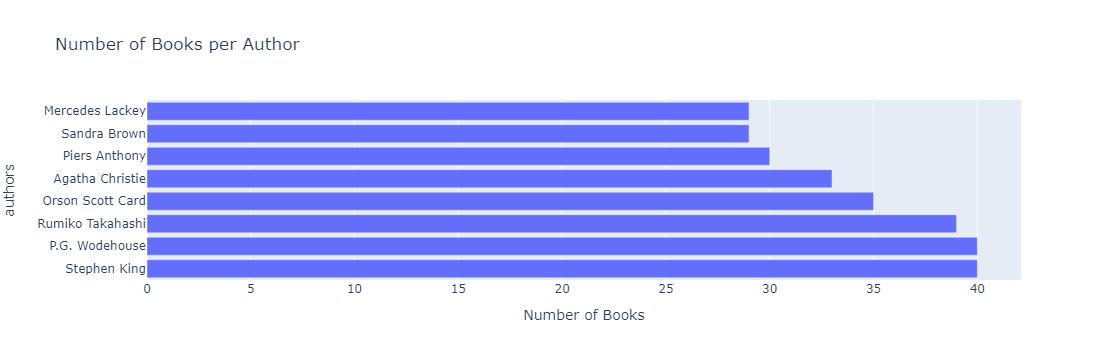

In [30]:
# Calculate the top 8 authors based on the number of books
top_authors = data['authors'].value_counts().head(8)

# Create a horizontal bar chart for the top authors
fig = px.bar(top_authors, x=top_authors.values, y=top_authors.index, orientation='h',
             labels={'x': 'Number of Books', 'y': 'Author'},  # Custom labels for axes
             title='Number of Books per Author')  # Title of the plot

# Display the plot
fig.show()


In [31]:
# Convert 'average_rating' to a numeric data type
data['average_rating'] = pd.to_numeric(data['average_rating'], 
                                       errors='coerce')

In [32]:
data['book_content'] = data['title'] + ' ' + data['authors']

In [33]:
data.head()

,bookID,title,authors,average_rating,book_content
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,Harry Potter and the Half-Blood Prince (Harry ...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,Harry Potter and the Order of the Phoenix (Har...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,Harry Potter and the Chamber of Secrets (Harry...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,Harry Potter and the Prisoner of Azkaban (Harr...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,Harry Potter Boxed Set Books 1-5 (Harry Potte...


In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['book_content'])

Here’s an explanation of how to use the `TfidfVectorizer` from Scikit-learn to transform the text data in your DataFrame into a TF-IDF matrix, which can be used for text analysis, such as finding similarity between texts or for machine learning models:

```python
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['book_content'])
```

### Detailed Explanation:

- **`TfidfVectorizer(stop_words='english')`**: This line creates an instance of the `TfidfVectorizer`. Here’s what each part means:
  - **`TfidfVectorizer`**: This is a class from Scikit-learn that converts a collection of raw documents to a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency, a common algorithm to transform text into a meaningful representation of numbers which is useful for comparing documents.
  - **`stop_words='english'`**: This parameter tells the vectorizer to ignore common English words like "and", "is", "in", etc. These words are usually not helpful in analyzing the text as they do not carry significant meaning.

- **`fit_transform(data['book_content'])`**: This method actually performs two steps:
  - **`fit`**: This part of the method "learns" what the important words are and how they are weighted in the entire dataset (in your case, the content of books).
  - **`transform`**: This converts the text data into the TF-IDF matrix format. Each row in this matrix represents a document (a book's content in your case), and each column represents a unique word in the entire dataset, with values representing the TF-IDF score.
  
The resulting `tfidf_matrix` can be used for various purposes like clustering, classification of documents, or finding the similarity between documents.

In [10]:
# Compute the cosine similarity between books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Here’s an explanation of how to compute the cosine similarity between books using the `linear_kernel` function from Scikit-learn, leveraging the TF-IDF matrix you created:

```python
# Compute the cosine similarity between books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
```

### Detailed Explanation:

- **`linear_kernel(tfidf_matrix, tfidf_matrix)`**: This function computes the cosine similarity between all pairs of items (in this case, books) represented in the TF-IDF matrix. Here's what each part means:
  - **`linear_kernel`**: This is a function from Scikit-learn used to compute the dot product of vectors which, when dealing with normalized vectors, is equivalent to cosine similarity. Cosine similarity measures the cosine of the angle between two non-zero vectors of an inner product space, helping to determine how similar two documents are irrespective of their size.
  - **`tfidf_matrix`**: This is the input matrix where each row represents a book's TF-IDF vector.
  - **`tfidf_matrix, tfidf_matrix`**: The function takes these two matrices (or the same matrix twice, in this case) to compute the similarity of each row (book) in the first matrix with every row (book) in the second matrix.

The result, `cosine_sim`, is a square matrix where the number of rows and columns equals the number of books. Each cell in the matrix represents the cosine similarity between two books, ranging from 0 (no similarity) to 1 (perfect similarity). This can be used in recommendation systems to suggest similar books based on content similarity.

In [11]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = data[data['title'] == book_title].index[0]

    # Get the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books (excluding the input book)
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended books
    return data['title'].iloc[book_indices]

Here's an explanation of the `recommend_books` function, which recommends books based on their content similarity calculated using cosine similarity:

```python
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = data[data['title'] == book_title].index[0]

    # Get the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books (excluding the input book)
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended books
    return data['title'].iloc[book_indices]
```

### Step-by-Step Explanation:
- **Function Definition**: `def recommend_books(book_title, cosine_sim=cosine_sim)`: This defines a function named `recommend_books` that takes a book title and an optional cosine similarity matrix. The default for `cosine_sim` is a precomputed matrix.

- **Find the Index of the Book**:
  - `idx = data[data['title'] == book_title].index[0]`: This line finds the index of the book in the DataFrame `data` that matches the provided `book_title`. The `.index[0]` fetches the first index found, which is necessary because the title might not be unique.

- **Get Similarity Scores**:
  - `sim_scores = list(enumerate(cosine_sim[idx]))`: This line creates a list of tuples where each tuple contains a book index and its similarity score with the book specified by `idx`.

- **Sort Books by Similarity**:
  - `sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)`: This sorts the list of tuples based on the similarity score (`x[1]`), in descending order (`reverse=True`), so the most similar books are first.

- **Select Top 10 Similar Books**:
  - `sim_scores = sim_scores[1:11]`: This slices the sorted list to get the top 10 books, excluding the first one (which is the book itself).

- **Extract Book Indices**:
  - `book_indices = [i[0] for i in sim_scores]`: This list comprehension extracts just the indices of the books from the `sim_scores` list.

- **Return Book Titles**:
  - `return data['title'].iloc[book_indices]`: This returns the titles of the books corresponding to the indices in `book_indices`. The `.iloc[]` is used to select rows by their integer position.

This function is typically used in a recommendation system to suggest similar books to users based on the content of the books they already like.

In [40]:
book_title = "When Santa Fell to Earth"
recommended_books = recommend_books(book_title)
print(recommended_books)

7315                               Inkheart (Inkworld  #1)
7316                               Inkspell (Inkworld  #2)
7317     Ghosthunters and the Incredibly Revolting Ghos...
10723                                                 Fell
7318     Ghosthunters and the Muddy Monster of Doom! (G...
329                    The Good Earth (House of Earth  #1)
1504                   The Good Earth (House of Earth  #1)
10476                                               Thirst
1480                                         Here on Earth
5044                                          Oliver Twist
Name: title, dtype: object
